In [4]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from os.path import join  
MY_GOOGLE_DRIVE_PATH = 'My Drive/repos/govind_swyam'
# MY_GOOGLE_DRIVE_PATH = 'My Drive/textual_analysis_email'
# MY_GOOGLE_DRIVE_PATH = 'My Drive/projects/textual_analysis_email'
GIT_USERNAME = "govindjsk"
GIT_TOKEN = "16eff71898dc86dd0f1ce1643033ef27ac6148b6"  
GIT_REPOSITORY = "catsetmat"
REPO_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
PROJECT_PATH = join(REPO_PATH, GIT_REPOSITORY)

print("PROJECT_PATH: ", PROJECT_PATH)

PROJECT_PATH:  /content/drive/My Drive/repos/govind_swyam/catsetmat


In [6]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/repos/govind_swyam/catsetmat


In [8]:
from src.our_utils import get_home_path
home_path = get_home_path()
%set_env PYTHONPATH=$home_path

%matplotlib inline
from IPython.display import Image, display
import os

settings = {'num_splits': 1,
            'dim': 16,
            'num_epochs': 10}
num_splits = settings['num_splits']
dim = settings['dim']
num_epochs = settings['num_epochs']

data_names = ['cast-crew-2011-inf', 'cast-kws-2011-inf', 'mag_acm', 'sample_mag_acm']
model_names = ['catsetmat', 'fspool']
# data_names=['sample_mag_acm']

env: PYTHONPATH=/content/drive/My Drive/repos/govind_swyam/catsetmat


In [11]:
for i, data_name in enumerate(data_names):
    print('********* {} of {} *********'.format(i+1, len(data_names)))
    !python src/train_test_sampler.py --data_name $data_name --num_splits $num_splits
    !python src/embedding_storer.py --data_name $data_name --num_splits $num_splits --dim $dim

********* 1 of 1 *********
1.0 -0.5
Creating splits:   0% 0/1 [00:00<?, ?it/s]WARNING: Too many (40) negative samples demanded. Capping to max possible (34).
Creating splits: 100% 1/1 [00:00<00:00, 120.81it/s]
1.0 -0.5
2020-04-19 09:13:36.108625: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Pre-storing embeddings: 100% 1/1 [00:02<00:00,  2.36s/it]


********** (1, 1) of (1, 2) [sample_mag_acm: catsetmat] **********
1.0 -0.5
2020-04-19 09:14:53.253266: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
------- SPLIT#0 (0 of 1) -------
16570
AUC train: 0.4012, test: 0.6429: 100% 10/10 [00:00<00:00, 12.36it/s]


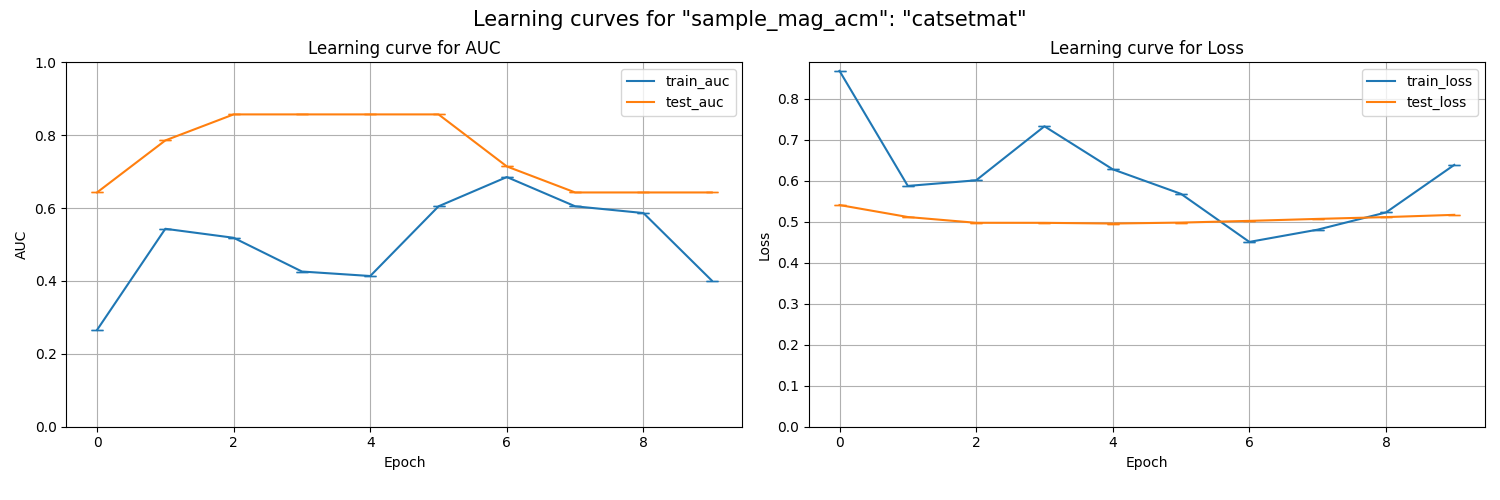

********** (1, 2) of (1, 2) [sample_mag_acm: fspool] **********
1.0 -0.5
2020-04-19 09:15:17.826239: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
------- SPLIT#0 (0 of 1) -------
40305
AUC train: 0.8642, test: 0.7143: 100% 10/10 [00:00<00:00, 68.42it/s]


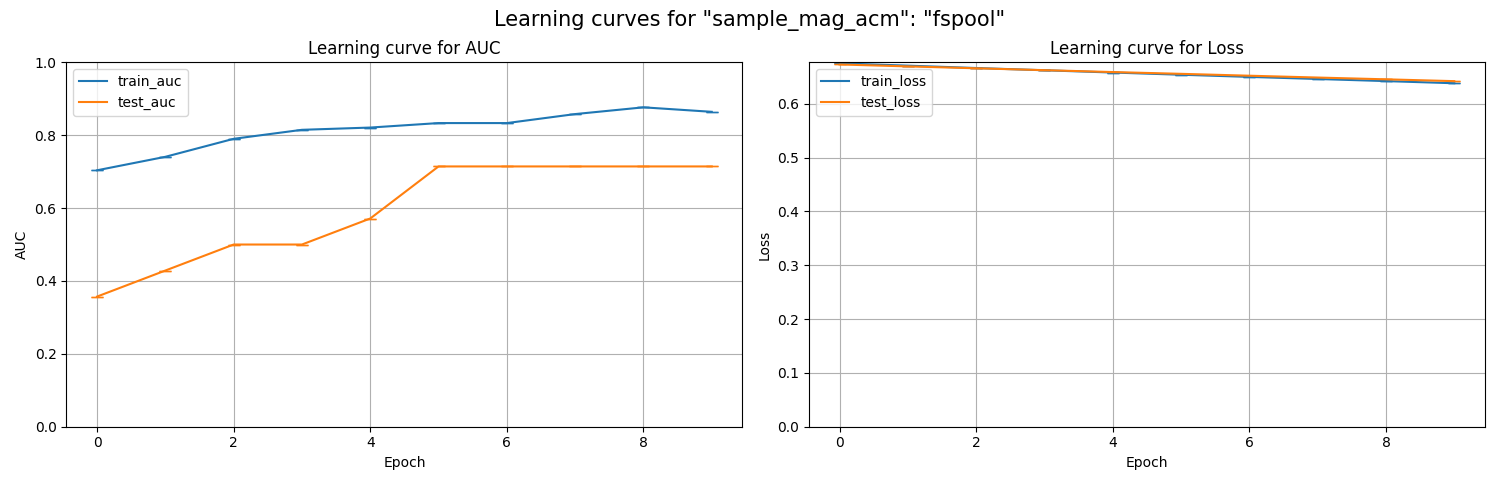

In [14]:
for i, data_name in enumerate(data_names):
    for j, model_name in enumerate(model_names):
        print('********** {} of {} [{}: {}] **********'.format((i+1, j+1), (len(data_names), len(model_names)), data_name, model_name))
        %shell python src/main.py --data_name $data_name \
                            --num_splits $num_splits \
                            --dim $dim \
                            --model_name $model_name \
                            --num_epochs $num_epochs
        im_path = os.path.join(home_path, 'results/{}/res/{}_learning_curve.png'.format(data_name, model_name))
        display(Image(im_path))